### Setup and Import Libraries

In [1]:
import pandas as pd
import numpy as np

# Load the datasets
deliveries = pd.read_csv('C:/Users/swati/Downloads/deliveries.csv/deliveries.csv')
matches=pd.read_csv('C:/Users/swati/Downloads/deliveries.csv/matches.csv')

#Display basic information
print('Deliveries Dataset:')
print(deliveries.info())
print('\nMatches Dataset:')
print(matches.info())


Deliveries Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           

### Dataset Content

In [2]:
#Key Columns and Relationship
# Key columns in deliveries.csv
print("Deliveries Columns:", deliveries.columns)

# Key columns in matches.csv
print("Matches Columns:", matches.columns)

# Common column to relate datasets
common_columns = set(deliveries.columns).intersection(matches.columns)
print("Common Columns:", common_columns)

# Relationship: match_id is the key to link both datasets


Deliveries Columns: Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')
Matches Columns: Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')
Common Columns: set()


In [3]:
#Verify Seasons Covered
# Check seasons in matches dataset
seasons = matches['season'].unique()
print("Seasons Covered:", seasons)

# Verify the range
print("Covers all seasons (2008-2020):", set(range(2008, 2021)).issubset(seasons))


Seasons Covered: ['2007' '2007/08' '2009' '2009/10' '2011' '2012' '2013' '2014' '2015'
 '2016' '2017' '2018' '2019' '2020/21' '2021' '2022' '2023' '2024']
Covers all seasons (2008-2020): False


### Data Cleaning and Preprocessing

In [4]:
#Missing Values
# Check for missing values
print("Missing values in Deliveries:")
print(deliveries.isnull().sum())
print("\nMissing values in Matches:")
print(matches.isnull().sum())


Missing values in Deliveries:
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

Missing values in Matches:
id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2       

In [5]:
#Duplicate Rows
# Check for duplicate rows
print("Duplicate rows in Deliveries:", deliveries.duplicated().sum())
print("Duplicate rows in Matches:", matches.duplicated().sum())

# Drop duplicates if necessary
deliveries.drop_duplicates(inplace=True)
matches.drop_duplicates(inplace=True)


Duplicate rows in Deliveries: 0
Duplicate rows in Matches: 0


In [6]:
#Datatypes and Conversion
# Check data types
print("Deliveries Data Types:\n", deliveries.dtypes)
print("\nMatches Data Types:\n", matches.dtypes)

# Convert columns if needed
# Example: Standardizing categorical columns
deliveries['batting_team'] = deliveries['batting_team'].str.strip().str.lower()
deliveries['bowling_team'] = deliveries['bowling_team'].str.strip().str.lower()
matches['team1'] = matches['team1'].str.strip().str.lower()
matches['team2'] = matches['team2'].str.strip().str.lower()


Deliveries Data Types:
 match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batter              object
bowler              object
non_striker         object
batsman_runs         int64
extra_runs           int64
total_runs           int64
extras_type         object
is_wicket            int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

Matches Data Types:
 id                   int64
season              object
city                object
date                object
match_type          object
player_of_match     object
venue               object
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
target_runs        float64
target_overs       float64
super_over          object
method              ob

### Analysis

In [16]:
#Insights by Combining Data
#before merging chnage the column name(both column name should be the same)
deliveries.rename(columns={'match_id': 'match_id'}, inplace=True)
matches.rename(columns={'id': 'match_id'}, inplace=True)

# Merge datasets on match_id
combined = deliveries.merge(matches, on='match_id', how='inner')

# Example: Team performance per match
team_performance = combined.groupby(['batter', 'batting_team'])['total_runs'].sum().reset_index()
print(team_performance)


              batter                 batting_team  total_runs
0     A Ashish Reddy              deccan chargers          40
1     A Ashish Reddy          sunrisers hyderabad         248
2           A Badoni         lucknow super giants         688
3         A Chandila             rajasthan royals           4
4           A Chopra        kolkata knight riders          58
...              ...                          ...         ...
1294    Yuvraj Singh  royal challengers bangalore         397
1295    Yuvraj Singh          sunrisers hyderabad         507
1296          Z Khan             delhi daredevils          10
1297          Z Khan               mumbai indians          42
1298          Z Khan  royal challengers bangalore          69

[1299 rows x 3 columns]


In [17]:
# Win rates of teams over the years
win_rates = matches.groupby(['winner', 'season']).size().reset_index(name='wins')
print(win_rates)

# Player performance metrics
player_performance = deliveries.groupby('batter')['batsman_runs'].sum().reset_index()
print(player_performance.sort_values(by='batsman_runs', ascending=False).head())

# Toss-winning strategies and match outcomes
toss_outcomes = matches.groupby(['toss_winner', 'toss_decision']).size().reset_index(name='count')
print(toss_outcomes)


                  winner   season  wins
0    Chennai Super Kings  2007/08     9
1    Chennai Super Kings     2009     8
2    Chennai Super Kings  2009/10     9
3    Chennai Super Kings     2011    11
4    Chennai Super Kings     2012    10
..                   ...      ...   ...
142  Sunrisers Hyderabad  2020/21     8
143  Sunrisers Hyderabad     2021     3
144  Sunrisers Hyderabad     2022     6
145  Sunrisers Hyderabad     2023     4
146  Sunrisers Hyderabad     2024     9

[147 rows x 3 columns]
        batter  batsman_runs
631    V Kohli          8014
512   S Dhawan          6769
477  RG Sharma          6630
147  DA Warner          6567
546   SK Raina          5536
                    toss_winner toss_decision  count
0           Chennai Super Kings           bat     59
1           Chennai Super Kings         field     63
2               Deccan Chargers           bat     24
3               Deccan Chargers         field     19
4                Delhi Capitals           bat     12
5   

# visualization


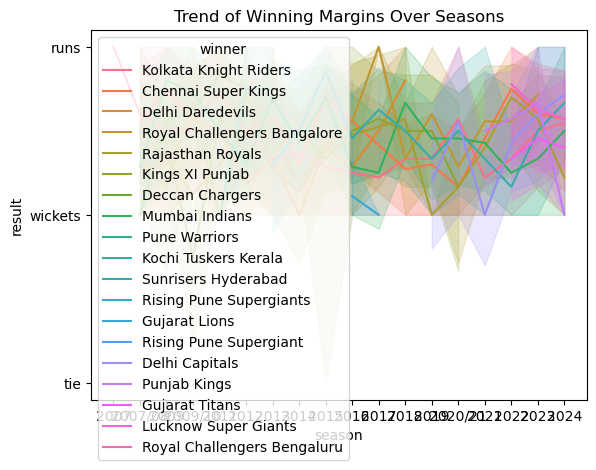

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Trend of total runs over seasons
sns.lineplot(data=matches, x='season', y='result', hue='winner')
plt.title("Trend of Winning Margins Over Seasons")
plt.show()


# Predicting Match Outcomes


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Prepare data for modeling
matches['win_team'] = matches['winner'].notna().astype(int)
features = matches[['team1', 'team2', 'toss_winner', 'venue']]
features = pd.get_dummies(features)
labels = matches['win_team']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict outcomes
predictions = model.predict(X_test)
print("Prediction Accuracy:", model.score(X_test, y_test))


Prediction Accuracy: 0.9954337899543378


In [22]:
# Team rankings by total wins
team_rankings = matches['winner'].value_counts().reset_index(name='wins')
team_rankings.rename(columns={'index': 'team'}, inplace=True)
print(team_rankings)

# Player rankings by total runs
player_rankings = deliveries.groupby('batter')['batsman_runs'].sum().reset_index()
player_rankings = player_rankings.sort_values(by='batsman_runs', ascending=False)
print(player_rankings)


                         winner  wins
0                Mumbai Indians   144
1           Chennai Super Kings   138
2         Kolkata Knight Riders   131
3   Royal Challengers Bangalore   116
4              Rajasthan Royals   112
5               Kings XI Punjab    88
6           Sunrisers Hyderabad    88
7              Delhi Daredevils    67
8                Delhi Capitals    48
9               Deccan Chargers    29
10               Gujarat Titans    28
11         Lucknow Super Giants    24
12                 Punjab Kings    24
13                Gujarat Lions    13
14                Pune Warriors    12
15       Rising Pune Supergiant    10
16  Royal Challengers Bengaluru     7
17         Kochi Tuskers Kerala     6
18      Rising Pune Supergiants     5
           batter  batsman_runs
631       V Kohli          8014
512      S Dhawan          6769
477     RG Sharma          6630
147     DA Warner          6567
546      SK Raina          5536
..            ...           ...
517       S Ladd

In [23]:
# Winning percentage based on toss decision
toss_strategy = matches.groupby(['toss_decision', 'winner']).size().unstack().fillna(0)
print(toss_strategy)


winner         Chennai Super Kings  Deccan Chargers  Delhi Capitals  \
toss_decision                                                         
bat                           63.0             14.0            13.0   
field                         75.0             15.0            35.0   

winner         Delhi Daredevils  Gujarat Lions  Gujarat Titans  \
toss_decision                                                    
bat                        29.0            2.0             9.0   
field                      38.0           11.0            19.0   

winner         Kings XI Punjab  Kochi Tuskers Kerala  Kolkata Knight Riders  \
toss_decision                                                                 
bat                       24.0                   0.0                   50.0   
field                     64.0                   6.0                   81.0   

winner         Lucknow Super Giants  Mumbai Indians  Pune Warriors  \
toss_decision                                                  